In [43]:
# from google.colab import files
# files.upload()

### **IBM HR Analytics Employee Attrition & Performance**
<img src="https://whatfix.com/blog/wp-content/uploads/2022/09/employee-churn.png" width="2000" height="500">


In the realm of machine learning and data analysis, the exploration of employee attrition within organizations stands as a critical area of study. Employee attrition, the process by which staff members leave the workforce over a given period, can have a substantial impact on the efficiency and economic stability of an organization. Understanding and predicting employee turnover is essential for maintaining a productive and engaged workforce.

#### **Problem Statement**
The primary objective of this project is to apply decision tree-based models to analyze and predict employee attrition. Decision trees, known for their simplicity, interpretability, and efficiency, are particularly well-suited for this task. These models can handle complex datasets with multiple features, making them ideal for dissecting the multifaceted nature of employee attrition.

#### **Dataset Overview**
The dataset in focus originates from a synthetic dataset created by IBM data scientists. It encapsulates various attributes of employees, including age, job role, marital status, education level, and more. The dataset comprises both categorical and numerical data, offering a comprehensive view of the employee profiles.

#### **Anticipated Insights**
Through this analysis, we aim to uncover the key factors contributing to employee attrition. By applying models like Random Forest, Gradient Boosting, LightGBM, and XGBoost, we expect to identify the most significant predictors of attrition. This insight will not only aid in predicting future attrition but also assist HR departments in formulating strategies to retain talent and improve overall employee satisfaction.

---


# **I. Importing Necessary Libraries and Dataset**

In [44]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from lightgbm.sklearn import LGBMClassifier
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.ensemble import StackingRegressor, RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [45]:
#read data from csv file
employee_data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display the first few rows of the dataset to understand its structure
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **II. Exploratory Data Analysis**

In [46]:
#dataset shape
employee_data_shape = employee_data.shape
print('rows: ', employee_data_shape[0])
print('columns: ', employee_data_shape[1])

rows:  1470
columns:  35


In [47]:
#categorical columns
categorical_columns = employee_data.select_dtypes(include=['object']).columns

#number of categorical columns
categorical_columns_len = len(categorical_columns)

print('no. of categorical columns:', categorical_columns_len)
print('categorical columns:', categorical_columns)

no. of categorical columns: 9
categorical columns: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [48]:
#non-categorical columns
non_categorical_columns = employee_data.select_dtypes(include=['int64', 'float64']).columns

#number of categorical columns
non_categorical_columns_len = len(non_categorical_columns)

print('no. of non-categorical columns:', non_categorical_columns_len)
print('non-categorical columns:', non_categorical_columns)

no. of non-categorical columns: 26
non-categorical columns: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


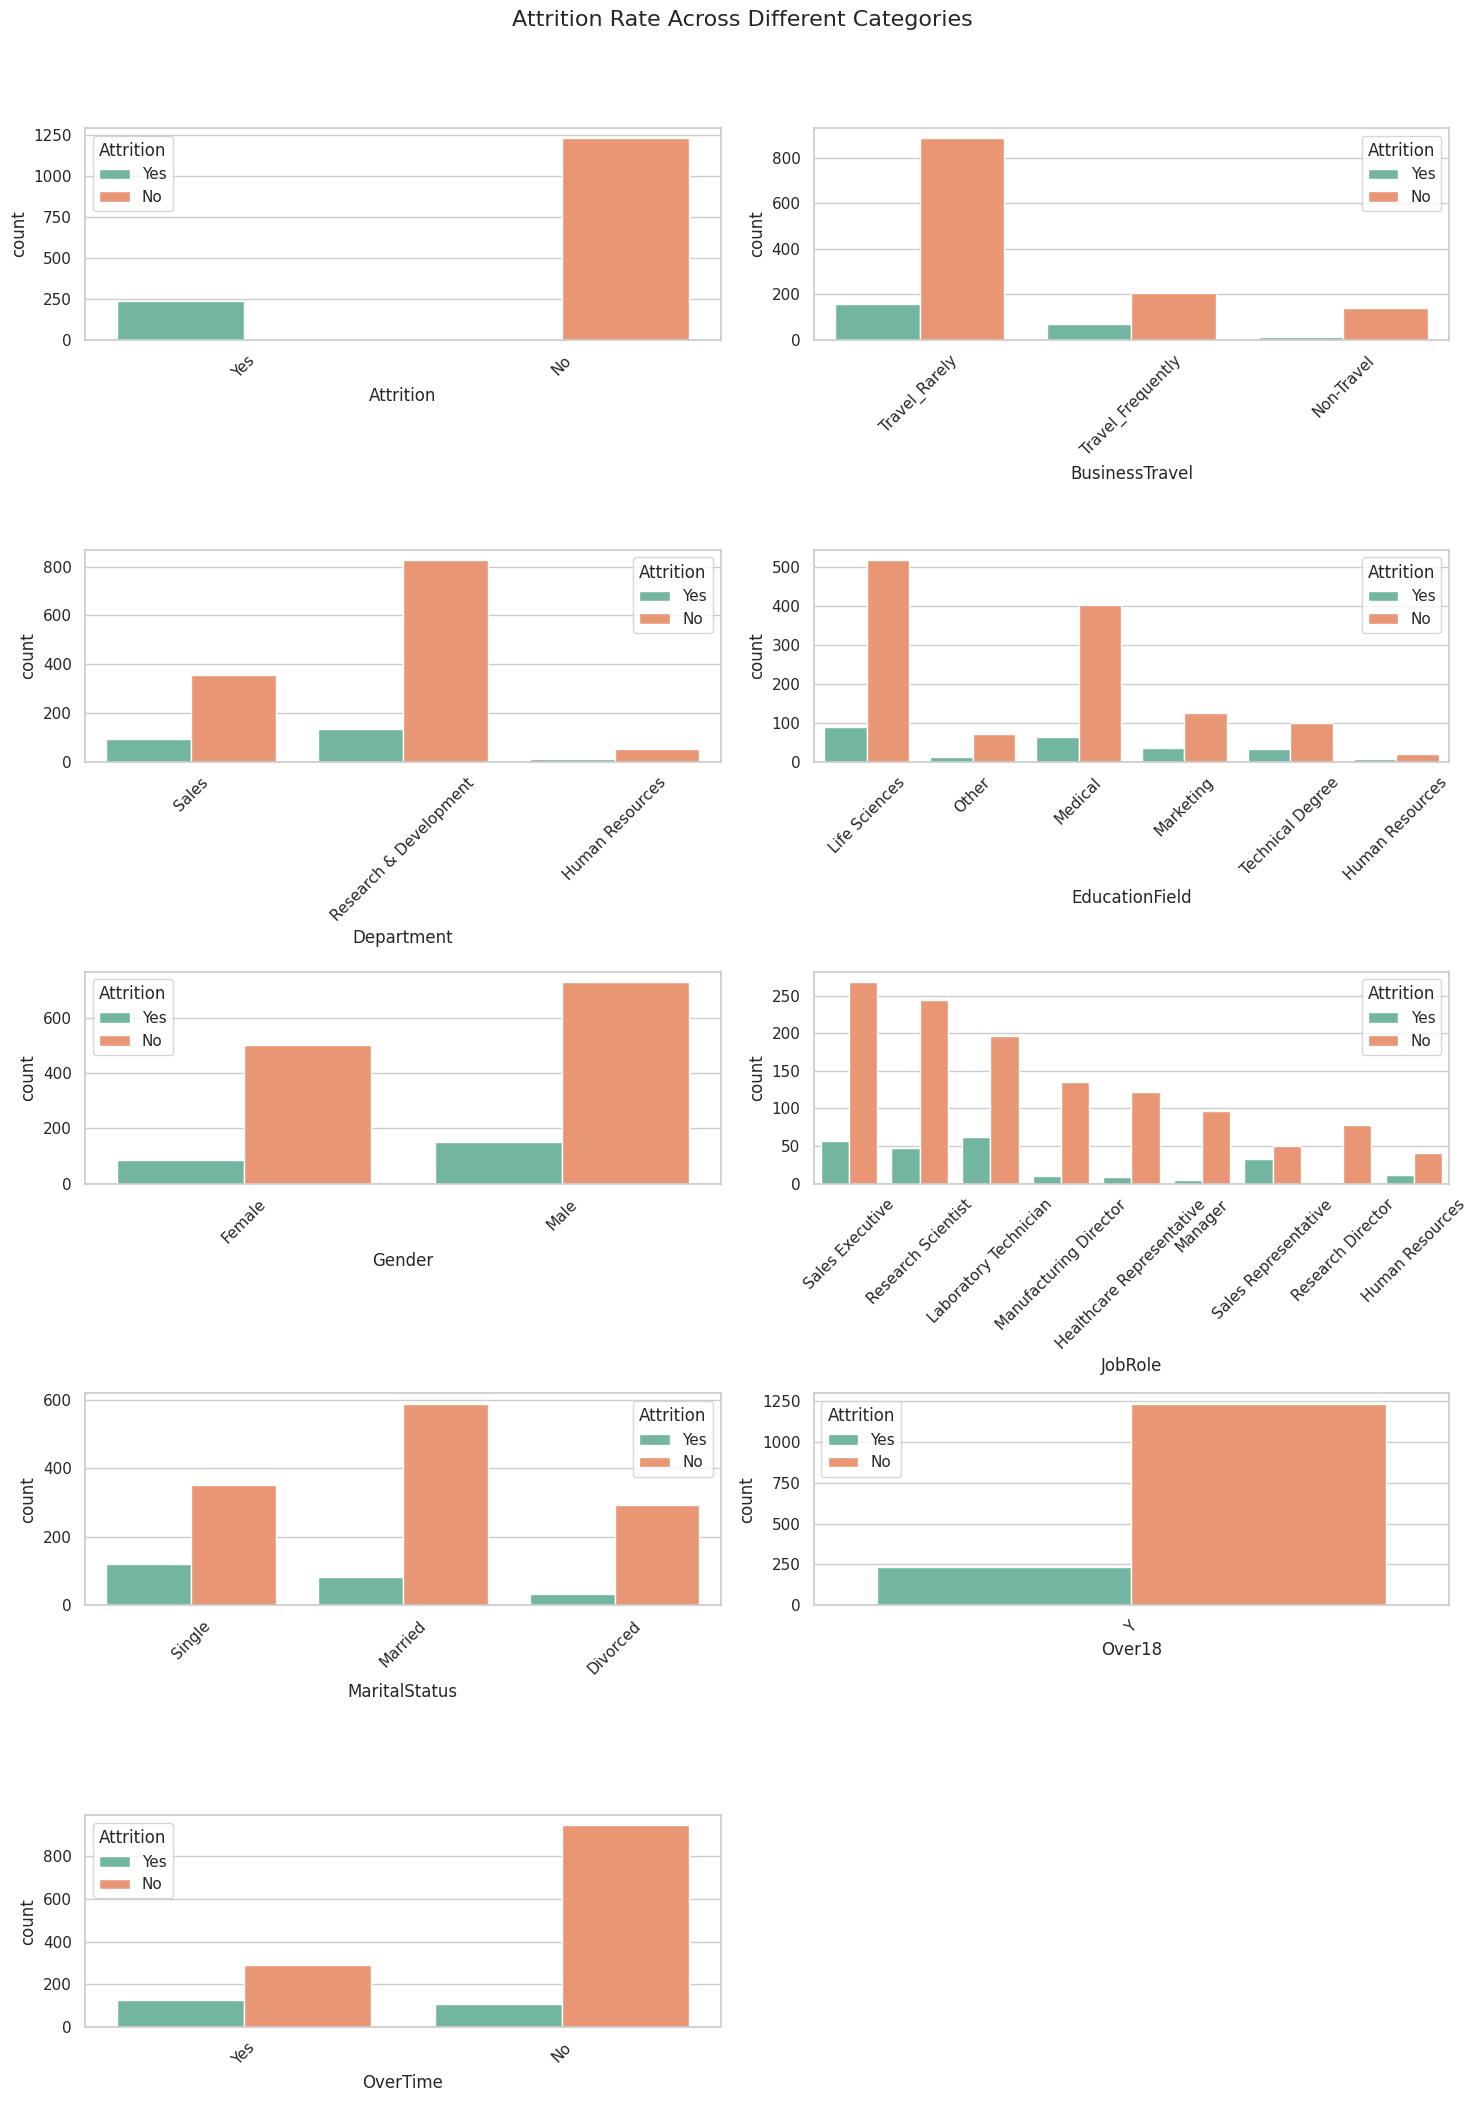

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Attrition rate across different categorical variables
categorical_features = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

# Creating subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()  # Flattening the axes array for easy iteration

# Plotting each categorical variable against Attrition
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Attrition', data=employee_data, ax=axes[i], palette="Set2")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate the x-axis labels for each subplot

# Adjusting the layout
plt.tight_layout()
plt.delaxes(axes[-1])  # Delete the extra subplot
plt.suptitle('Attrition Rate Across Different Categories', y=1.05, fontsize=16)

plt.show()


The visualizations provide insights into the attrition rate across different categories:

**1. Education:** There doesn't appear to be a strong correlation between education level and attrition rate. Attrition is present across all education levels, but it does not significantly vary as education level changes.

**2. Job Role:** Certain job roles, like Sales Representative and Laboratory Technician, show a higher attrition rate compared to others like Manager or Research Director. This could indicate that roles with possibly lower entry barriers or lower levels of specialization might have higher turnover.

**3. Marital Status:** Single employees tend to have a higher attrition rate compared to married or divorced employees. This might be due to different life stages or commitments.

**4. OverTime:** Employees who work overtime show a significantly higher attrition rate. This could point towards work-life balance being a crucial factor in employee retention.

**5. WorkLifeBalance:** Interestingly, employees who rated their work-life balance as low (1) show a higher attrition rate. This aligns with the observation regarding overtime and suggests that maintaining a healthy work-life balance is vital for employee retention.



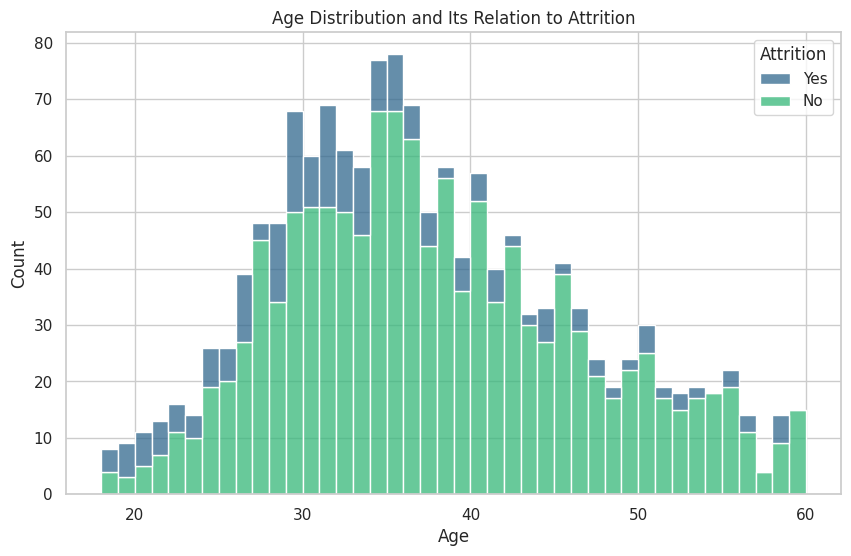

In [50]:
# Age distribution and its relation to attrition
plt.figure(figsize=(10, 6))
sns.histplot(data=employee_data, x="Age", hue="Attrition", multiple="stack", palette="viridis", binwidth=1)
plt.title("Age Distribution and Its Relation to Attrition")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The age distribution in relation to attrition reveals:

**1. Younger Employees and Attrition:** There's a noticeable trend where younger employees (especially in their late 20s to early 30s) show higher attrition rates compared to older age groups. This could be attributed to younger employees being in the early stages of their careers and more likely to change jobs for better opportunities or career advancement.

**2.Decrease in Attrition with Age:** As age increases, the attrition rate seems to decrease. Employees in their mid-30s and onwards show lower attrition rates. This might be due to increased job stability, higher positions, or more responsibilities both in their personal and professional lives.

**3. Peaks and Troughs:** Certain age groups, like mid-20s and early 30s, have distinct peaks in attrition, suggesting that these age ranges might be critical points for employee turnover.

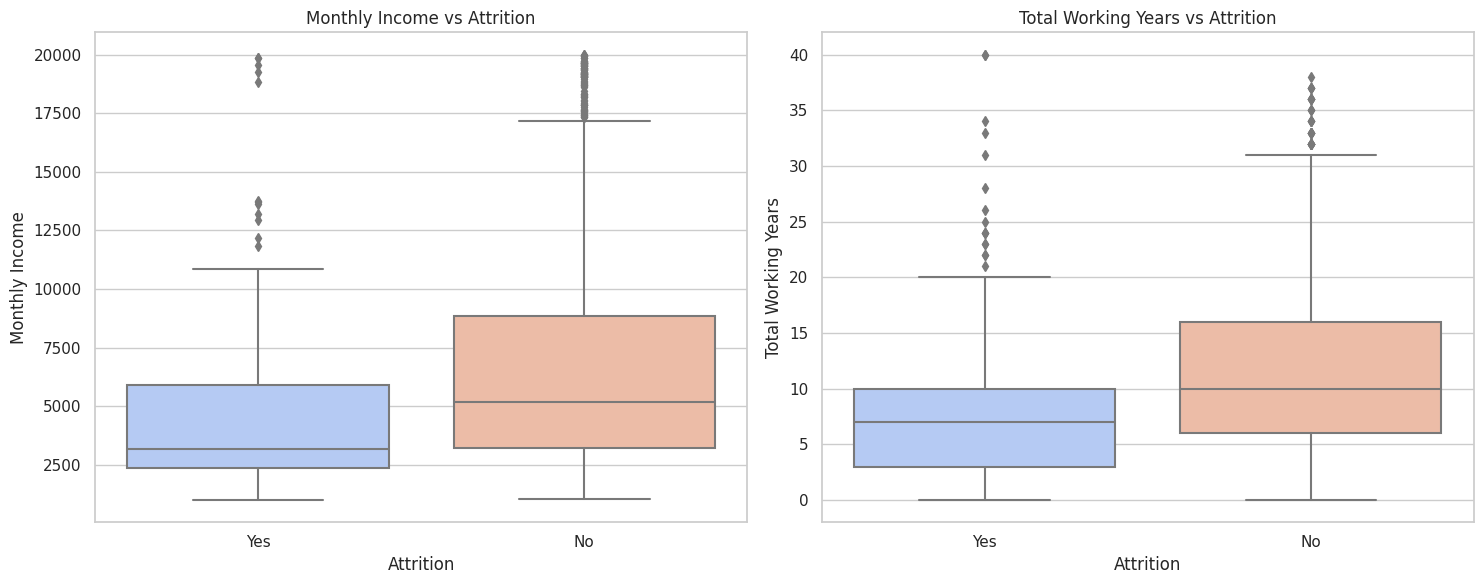

In [51]:
# Box plots for Monthly Income and Total Working Years by Attrition status
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Monthly Income vs Attrition
sns.boxplot(x="Attrition", y="MonthlyIncome", data=employee_data, ax=axes[0], palette="coolwarm")
axes[0].set_title("Monthly Income vs Attrition")
axes[0].set_xlabel("Attrition")
axes[0].set_ylabel("Monthly Income")

# Total Working Years vs Attrition
sns.boxplot(x="Attrition", y="TotalWorkingYears", data=employee_data, ax=axes[1], palette="coolwarm")
axes[1].set_title("Total Working Years vs Attrition")
axes[1].set_xlabel("Attrition")
axes[1].set_ylabel("Total Working Years")

plt.tight_layout()
plt.show()


The box plots for Monthly Income and Total Working Years in relation to attrition reveal the following insights:

**1. Monthly Income:** There's a noticeable difference in the distribution of monthly income between employees who left (Attrition = Yes) and those who stayed (Attrition = No).
Employees who left generally had lower median monthly incomes compared to those who stayed. This could suggest that compensation is a significant factor in an employee's decision to stay with or leave a company.
The wider range and higher outliers in the monthly income for employees who stayed might indicate more opportunities for financial growth within the company, which could contribute to higher retention.

**2. Total Working Years:** Employees who left the company tend to have fewer total working years compared to those who stayed. This aligns with the earlier observation about younger employees being more likely to leave.
The more extensive range of working years among employees who stayed suggests a correlation between longer tenure at the company and lower attrition rates.

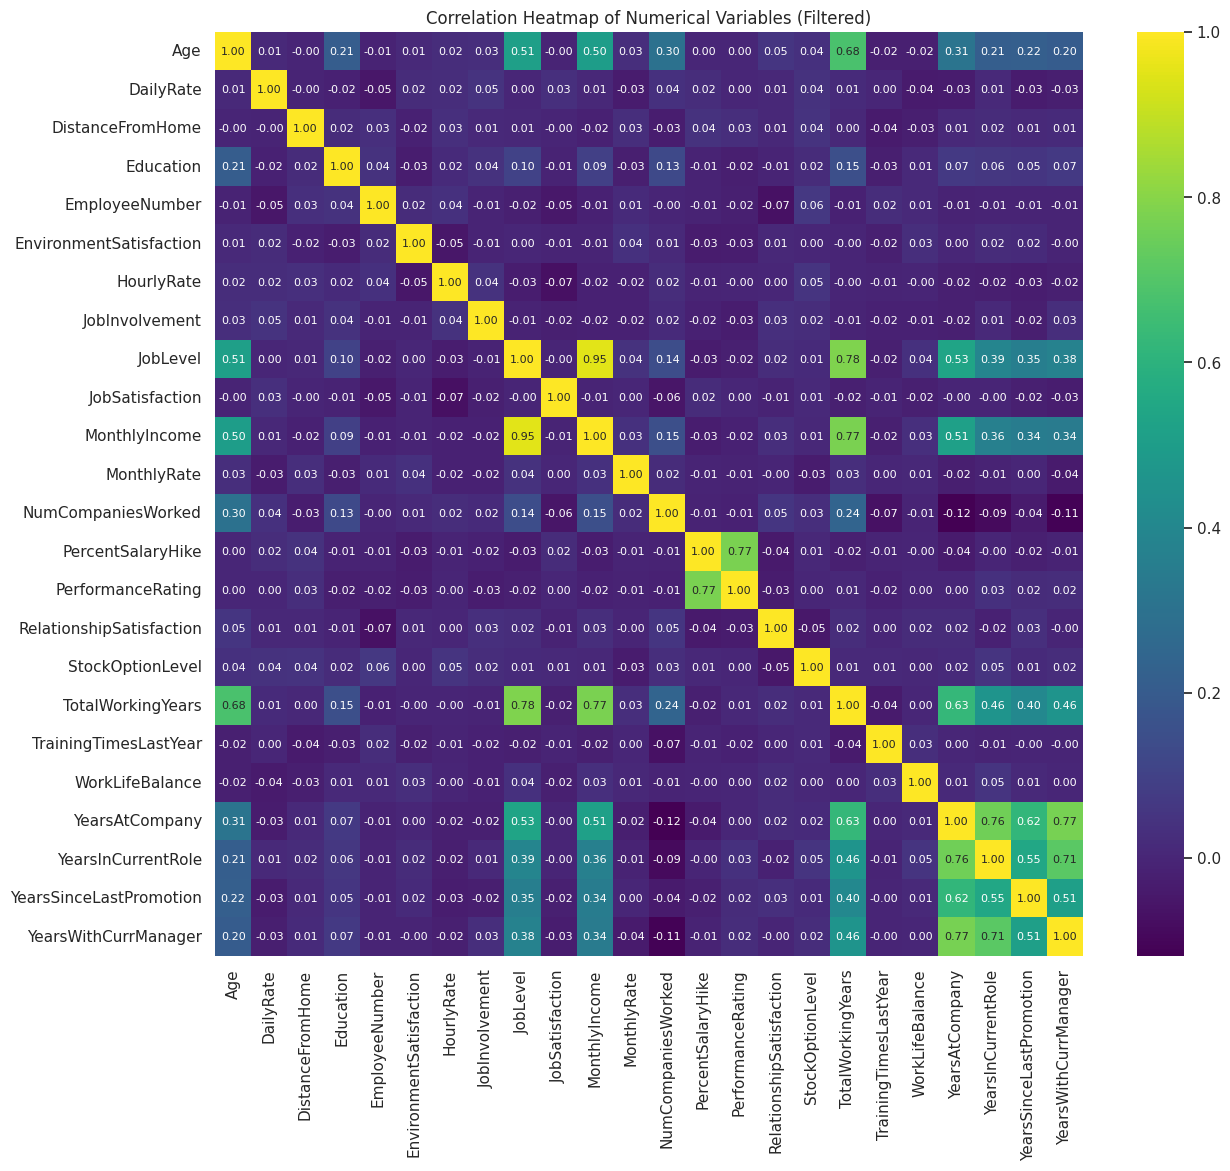

In [52]:
# Removing constant columns from the dataset
non_constant_columns = employee_data.loc[:, employee_data.apply(pd.Series.nunique) != 1]
numerical_data_filtered = non_constant_columns.select_dtypes(include=['int64', 'float64'])

# Recalculating the correlation matrix
correlation_matrix_filtered = numerical_data_filtered.corr()

# Adjusting the heatmap with the filtered data
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix_filtered, annot=True, fmt=".2f", cmap="viridis", annot_kws={"size": 8})
plt.title("Correlation Heatmap of Numerical Variables (Filtered)")
plt.show()



The correlation heatmap provides insights into how different numerical variables in the dataset are related to each other:

**1. High Correlation Pairs:** Some variables show a high degree of correlation. For example, TotalWorkingYears is highly correlated with Age, YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager, and YearsSinceLastPromotion. This is expected as these variables are all related to the length of an employee's career and tenure at the company.

**2. Moderate Correlations:** There are also moderate correlations between some variables, such as between MonthlyIncome and TotalWorkingYears, indicating that employees with more years of working experience tend to have higher salaries.

**3. Low Correlation with Attrition:** Interestingly, most variables have a relatively low correlation with Attrition, suggesting that no single factor strongly predicts whether an employee will leave. However, Age, TotalWorkingYears, and YearsWithCurrManager have a somewhat more negative correlation with attrition, implying that more experienced and older employees, or those with a longer tenure with their current manager, are less likely to leave.

**4. Job Level and Income:** JobLevel is strongly correlated with MonthlyIncome, which is expected as higher job positions usually come with higher pay.

# **III. Data Cleaning**

***a. Handling Missing values, duplicate rows and checking data types***

In [53]:
# Checking for missing values
missing_values = employee_data.isnull().sum()

# Checking for duplicate rows
duplicate_rows = employee_data.duplicated().sum()

# Identifying constant columns
constant_columns = [col for col in employee_data.columns if employee_data[col].nunique() == 1]

# Summarizing the findings
missing_values_summary = missing_values[missing_values > 0]
constant_columns_summary = constant_columns

missing_values_summary, duplicate_rows, constant_columns_summary


(Series([], dtype: int64), 0, ['EmployeeCount', 'Over18', 'StandardHours'])

In [54]:
# Removing constant columns
employee_data_cleaned = employee_data.drop(columns=constant_columns_summary)

# Checking data types of remaining columns
data_types = employee_data_cleaned.dtypes

data_types


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

Based on the initial data cleaning checks:

**1. Missing Values:** There are no missing values in the dataset.

**2. Duplicate Rows:** There are no duplicate rows in the dataset.

**3. Constant Columns:** The dataset contains a few constant columns - 'EmployeeCount', 'Over18', and 'StandardHours'. These columns have the same value for ​​all records and therefore do not provide any variability or useful information for analysis.

***b. Outlier Detection and Handling***

In [55]:
# Identifying outliers using the IQR method for each numerical feature
outliers = {}

for column in employee_data_cleaned.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = employee_data_cleaned[column].quantile(0.25)
    Q3 = employee_data_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    outliers[column] = employee_data_cleaned[(employee_data_cleaned[column] < lower_bound) |
                                             (employee_data_cleaned[column] > upper_bound)].shape[0]


outliers_df = pd.DataFrame.from_dict(outliers, orient='index', columns=['Number of Outliers'])
outliers_df.sort_values(by='Number of Outliers', ascending=False)

,Number of Outliers
TrainingTimesLastYear,238
PerformanceRating,226
MonthlyIncome,114
YearsSinceLastPromotion,107
YearsAtCompany,104
StockOptionLevel,85
TotalWorkingYears,63
NumCompaniesWorked,52
YearsInCurrentRole,21
YearsWithCurrManager,14


***b.1. Mean and Median for Outlier Columns***

In [56]:
#create a dataframe for outlier columns
outlier_columns = ['TrainingTimesLastYear', 'PerformanceRating', 'MonthlyIncome', 'YearsSinceLastPromotion', 'YearsAtCompany', 'StockOptionLevel', 'TotalWorkingYears', 'NumCompaniesWorked', 'YearsInCurrentRole', 'YearsWithCurrManager']
outlier_df = employee_data_cleaned[outlier_columns]

#find the mean() and median() for the outlier columns
mean_values = outlier_df.mean()
median_values = outlier_df.median()

#create a dataframe representing the mean() and median() for each outlier column.
outliers_summary_df = pd.DataFrame({'Mean': mean_values, 'Median': median_values})
outliers_summary_df

,Mean,Median
TrainingTimesLastYear,2.799320,3.0
PerformanceRating,3.153741,3.0
MonthlyIncome,6502.931293,4919.0
YearsSinceLastPromotion,2.187755,1.0
YearsAtCompany,7.008163,5.0
StockOptionLevel,0.793878,1.0
TotalWorkingYears,11.279592,10.0
NumCompaniesWorked,2.693197,2.0
YearsInCurrentRole,4.229252,3.0
YearsWithCurrManager,4.123129,3.0


**Remark**- For most columns, the mean and median values are nearly similar. However, the **YearsSinceLastPromotion** column's mean value is over twice as significant as the median value. The median indicates that most employees were promoted just one year ago, whereas the mean suggests that most were promoted over two years ago. Therefore, the outliers should be removed to correct this discrepancy.

***b.2. Remove Outliers from 'YearsSinceLastPromotion'***

In [57]:
#remove outliers from 'YearsSinceLastPromotion' column
column_to_filter = 'YearsSinceLastPromotion'
Q1 = employee_data_cleaned[column_to_filter].quantile(0.25)
Q3 = employee_data_cleaned[column_to_filter].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

employee_data_filtered = employee_data_cleaned[(employee_data_cleaned[column_to_filter] >= lower_bound) &
                                                  (employee_data_cleaned[column_to_filter] <= upper_bound)]

print('shape before filter: ', employee_data_cleaned.shape)
print('shape after filter: ', employee_data_filtered.shape)
print('record difference: ', employee_data_cleaned.shape[0] - employee_data_filtered.shape[0])

shape before filter:  (1470, 32)
shape after filter:  (1363, 32)
record difference:  107


***b.3. Check MEAN & MEDIAN after Outlier Removal from 'YearsSinceLastPromotion'***

In [58]:
#create dataframe for columns with outliers from employee_data_filtered.
outlier_df = employee_data_filtered[outlier_columns]

#calculate the mean() and median() for outlier_df dataframe
mean_values = outlier_df.mean()
median_values = outlier_df.median()

#create a dataframe representing the mean() and median() for each outlier column.
outliers_summary_df = pd.DataFrame({'Mean': mean_values, 'Median': median_values})
outliers_summary_df

,Mean,Median
TrainingTimesLastYear,2.798239,3.0
PerformanceRating,3.151137,3.0
MonthlyIncome,6120.344828,4739.0
YearsSinceLastPromotion,1.484960,1.0
YearsAtCompany,6.138665,5.0
StockOptionLevel,0.793837,1.0
TotalWorkingYears,10.568599,9.0
NumCompaniesWorked,2.714600,2.0
YearsInCurrentRole,3.843727,3.0
YearsWithCurrManager,3.777696,3.0


**1. Keep Contextually Relevant Outliers:** For fields like MonthlyIncome, TotalWorkingYears, YearsAtCompany,  where high values might realistically exist, we should keep the outliers as they could represent actual scenarios, such as high-income executives or long-tenured employees.

**2. Assess Skewed Distributions:** For PerformanceRating and TrainingTimesLastYear, the high number of outliers suggests a skewed distribution. This could be realistic (e.g., most employees have a standard performance rating, with a few exceptional cases). We will keep these outliers as they represent important variations.

**3. Review Outliers with Suspicious Counts:** In a real-world scenario, some employees might indeed have worked at a significantly higher number of companies compared to their peers. This could be due to a variety of reasons, such as career choices, industry norms, or personal circumstances. In such cases, these outliers represent genuine data points that provide insights into certain employee segments


**4. Variables with Few Outliers:** For variables like YearsInCurrentRole and YearsWithCurrManager, where the number of outliers is relatively low, it could be reasonable to keep them unless they represent impossible scenarios.


Given these considerations, the recommended approach would be to retain the outliers in this dataset except for 'YearsSinceLastPromotion' .

***c. Encoding Categorical Features***

In [59]:
# Selecting categorical variables for one-hot encoding
categorical_variables = employee_data_cleaned.select_dtypes(include=['object']).columns

# Applying one-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(employee_data_cleaned[categorical_variables])

# Creating a DataFrame with the encoded data
encoded_columns = encoder.get_feature_names_out(categorical_variables)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Concatenating the encoded df with the original df and dropping the original categorical columns
employee_data_encoded = pd.concat([employee_data_cleaned.drop(columns=categorical_variables), encoded_df], axis=1)

employee_data_encoded.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,49,279,8,1,2,3,61,2,2,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37,1373,2,2,4,4,92,2,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,33,1392,3,4,5,4,56,3,1,3,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,27,591,2,1,7,1,40,3,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# **IV. Coding Implementation**

In [60]:
#common funtion to evaluate models accuracy, precision, recall, f1, roc_auc and training time.
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    start = time.time()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    end = time.time()

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "training_time": end - start
    }

In [61]:
# Define X (features) and y (target)
X = employee_data_encoded.drop(['Attrition_Yes', 'Attrition_No'], axis=1)
y = employee_data_encoded['Attrition_Yes']

In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **1. Random Forest**

**A. With cv=2**

In [63]:
#grid of hyperparameter values
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10,20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1,2]
} #final hyperparameter setting

In [64]:
# Hyperparameter tuning for Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=2, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
best_rf_metrics = train_evaluate_model(best_rf_model, X_train, X_test, y_train, y_test)

print("Random Forest Metrics:", best_rf_metrics)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
Random Forest Metrics: {'accuracy': 0.8775510204081632, 'precision': 0.8, 'recall': 0.10256410256410256, 'f1': 0.18181818181818182, 'roc_auc': 0.5493212669683258, 'training_time': 0.6491532325744629}


**B. With cv=3**

In [65]:
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
best_rf_metrics = train_evaluate_model(best_rf_model, X_train, X_test, y_train, y_test)

print("Random Forest Metrics:", best_rf_metrics)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Random Forest Metrics: {'accuracy': 0.8775510204081632, 'precision': 0.7142857142857143, 'recall': 0.1282051282051282, 'f1': 0.21739130434782608, 'roc_auc': 0.5601809954751131, 'training_time': 0.295546293258667}


**C. With cv=4**

In [66]:
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=4, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
best_rf_metrics = train_evaluate_model(best_rf_model, X_train, X_test, y_train, y_test)

print("Random Forest Metrics:", best_rf_metrics)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
Random Forest Metrics: {'accuracy': 0.8707482993197279, 'precision': 0.5714285714285714, 'recall': 0.10256410256410256, 'f1': 0.17391304347826086, 'roc_auc': 0.5453996983408749, 'training_time': 0.30934834480285645}


**Important Feature**

In [67]:
#Feature classified as important by Random Forest
feature_importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N features
top_features = 10
print("Top", top_features, "crucial features:")
print(feature_importance_df.head(top_features))

Top 10 crucial features:
              Feature  Importance
10      MonthlyIncome    0.075860
0                 Age    0.049384
1           DailyRate    0.044608
50        OverTime_No    0.044525
20     YearsAtCompany    0.043734
17  TotalWorkingYears    0.043725
4      EmployeeNumber    0.042717
11        MonthlyRate    0.041680
51       OverTime_Yes    0.040000
2    DistanceFromHome    0.038637


# **2. Gradient Boosting**

In [68]:
#grid of hyperparameter values
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 8]
}#final hyperparameter settings

**A. with cv=2**

In [69]:
# Hyperparameter tuning for Gradient Boosting
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_grid_search = GridSearchCV(gb_classifier, gb_param_grid, cv=2, n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_
best_gb_metrics = train_evaluate_model(best_gb_model, X_train, X_test, y_train, y_test)

print("Gradient Boosting Metrics:", best_gb_metrics)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Gradient Boosting Metrics: {'accuracy': 0.8809523809523809, 'precision': 0.6666666666666666, 'recall': 0.20512820512820512, 'f1': 0.31372549019607837, 'roc_auc': 0.5947209653092006, 'training_time': 0.7315120697021484}


**B. with cv=3**

In [70]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_grid_search = GridSearchCV(gb_classifier, gb_param_grid, cv=3, n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_
best_gb_metrics = train_evaluate_model(best_gb_model, X_train, X_test, y_train, y_test)

print("Gradient Boosting Metrics:", best_gb_metrics)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Gradient Boosting Metrics: {'accuracy': 0.8741496598639455, 'precision': 0.6, 'recall': 0.15384615384615385, 'f1': 0.2448979591836735, 'roc_auc': 0.5690799396681749, 'training_time': 0.6213099956512451}


**C. with cv=4**

In [71]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_grid_search = GridSearchCV(gb_classifier, gb_param_grid, cv=4, n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_
best_gb_metrics = train_evaluate_model(best_gb_model, X_train, X_test, y_train, y_test)

print("Gradient Boosting Metrics:", best_gb_metrics)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Gradient Boosting Metrics: {'accuracy': 0.8809523809523809, 'precision': 0.6666666666666666, 'recall': 0.20512820512820512, 'f1': 0.31372549019607837, 'roc_auc': 0.5947209653092006, 'training_time': 0.5368425846099854}


**Important Features**

In [72]:
#Feature classified as important by Gradient Boosting
feature_importances = best_gb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N features
top_features = 10
print("Top", top_features, "crucial features:")
print(feature_importance_df.head(top_features))

Top 10 crucial features:
              Feature  Importance
10      MonthlyIncome    0.123726
50        OverTime_No    0.098262
0                 Age    0.064482
8            JobLevel    0.050425
2    DistanceFromHome    0.044179
16   StockOptionLevel    0.043974
7      JobInvolvement    0.041552
4      EmployeeNumber    0.034367
17  TotalWorkingYears    0.033585
1           DailyRate    0.033458


# **3. Light Gradient Boosting**

In [73]:
#grid of hyperparameter values
lgb_param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200]
}#final hyperparameter settings

**A. with cv=2**

In [74]:
# Hyperparameter tuning for LightGBM
lgb_grid_search = GridSearchCV(lgb.LGBMClassifier(random_state=42), lgb_param_grid, cv=2, n_jobs=-1, verbose=2)
lgb_grid_search.fit(X_train, y_train)
best_lgb_model = lgb_grid_search.best_estimator_
best_lgb_metrics = train_evaluate_model(best_lgb_model, X_train, X_test, y_train, y_test)

print("LightGBM Metrics:", best_lgb_metrics)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 198, number of negative: 978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1418
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168367 -> initscore=-1.597243
[LightGBM] [Info] Start training from score -1.597243
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 198, number of negative: 978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead

**B. with cv=3**

In [75]:
lgb_grid_search = GridSearchCV(lgb.LGBMClassifier(random_state=42), lgb_param_grid, cv=3, n_jobs=-1, verbose=2)
lgb_grid_search.fit(X_train, y_train)
best_lgb_model = lgb_grid_search.best_estimator_
best_lgb_metrics = train_evaluate_model(best_lgb_model, X_train, X_test, y_train, y_test)

print("LightGBM Metrics:", best_lgb_metrics)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 198, number of negative: 978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1418
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168367 -> initscore=-1.597243
[LightGBM] [Info] Start training from score -1.597243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

**C. with cv=4**

In [76]:
lgb_grid_search = GridSearchCV(lgb.LGBMClassifier(random_state=42), lgb_param_grid, cv=4, n_jobs=-1, verbose=2)
lgb_grid_search.fit(X_train, y_train)
best_lgb_model = lgb_grid_search.best_estimator_
best_lgb_metrics = train_evaluate_model(best_lgb_model, X_train, X_test, y_train, y_test)

print("LightGBM Metrics:", best_lgb_metrics)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 198, number of negative: 978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1418
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168367 -> initscore=-1.597243
[LightGBM] [Info] Start training from score -1.597243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

**Important Features**

In [77]:
#Feature classified as important by Gradient Boosting
feature_importances = best_lgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N features
top_features = 10
print("Top", top_features, "crucial features:")
print(feature_importance_df.head(top_features))

Top 10 crucial features:
               Feature  Importance
10       MonthlyIncome         414
1            DailyRate         347
4       EmployeeNumber         318
0                  Age         282
11         MonthlyRate         281
2     DistanceFromHome         244
20      YearsAtCompany         215
6           HourlyRate         210
12  NumCompaniesWorked         173
13   PercentSalaryHike         161


# **4. XGBoost**

In [78]:
#grid of hyperparameter values
xgb_param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.05],
    'max_depth': [3, 8]
}#final hyperparameter setting

**A. with cv=2**

In [79]:
# Hyperparameter tuning for XGBoost
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42), xgb_param_grid, cv=2, n_jobs=-1, verbose=2)
xgb_grid_search.fit(X_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_
best_xgb_metrics = train_evaluate_model(best_xgb_model, X_train, X_test, y_train, y_test)

print("XGBoost Metrics:", best_xgb_metrics)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
XGBoost Metrics: {'accuracy': 0.8775510204081632, 'precision': 0.7142857142857143, 'recall': 0.1282051282051282, 'f1': 0.21739130434782608, 'roc_auc': 0.5601809954751131, 'training_time': 0.10058283805847168}


**B. with cv=3**

In [80]:
# Hyperparameter tuning for XGBoost
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42), xgb_param_grid, cv=3, n_jobs=-1, verbose=2)
xgb_grid_search.fit(X_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_
best_xgb_metrics = train_evaluate_model(best_xgb_model, X_train, X_test, y_train, y_test)

print("XGBoost Metrics:", best_xgb_metrics)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
XGBoost Metrics: {'accuracy': 0.8775510204081632, 'precision': 0.5882352941176471, 'recall': 0.2564102564102564, 'f1': 0.35714285714285715, 'roc_auc': 0.6144796380090497, 'training_time': 0.263822078704834}


**C. with cv=4**

In [81]:
# Hyperparameter tuning for XGBoost
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42), xgb_param_grid, cv=4, n_jobs=-1, verbose=2)
xgb_grid_search.fit(X_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_
best_xgb_metrics = train_evaluate_model(best_xgb_model, X_train, X_test, y_train, y_test)

print("XGBoost Metrics:", best_xgb_metrics)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
XGBoost Metrics: {'accuracy': 0.8775510204081632, 'precision': 0.5882352941176471, 'recall': 0.2564102564102564, 'f1': 0.35714285714285715, 'roc_auc': 0.6144796380090497, 'training_time': 0.3776211738586426}


**Important Features**

In [82]:
#Feature classified as important by Gradient Boosting
feature_importances = best_xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N features
top_features = 10
print("Top", top_features, "crucial features:")
print(feature_importance_df.head(top_features))

Top 10 crucial features:
                    Feature  Importance
8                  JobLevel    0.075065
50              OverTime_No    0.070227
45  JobRole_Sales Executive    0.058310
33   EducationField_Medical    0.050105
49     MaritalStatus_Single    0.039465
17        TotalWorkingYears    0.038388
16         StockOptionLevel    0.038084
10            MonthlyIncome    0.028412
0                       Age    0.026376
12       NumCompaniesWorked    0.025770


# **5. Logistic Regression**

In [83]:
#grid of hyperparameter values
logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization type
}#final hyperparameter setings

**A. with cv=2**

In [84]:
logreg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=5000)
logreg_grid_search = GridSearchCV(
    logreg_model,
    logreg_param_grid,
    cv=2,
    n_jobs=-1,
    verbose=2
)
logreg_grid_search.fit(X_train, y_train)
best_logreg_model = logreg_grid_search.best_estimator_
best_logistic_metrics = train_evaluate_model(best_logreg_model, X_train, X_test, y_train, y_test)

print("Logistic Metrics:", best_logistic_metrics)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Logistic Metrics: {'accuracy': 0.8639455782312925, 'precision': 0.4666666666666667, 'recall': 0.1794871794871795, 'f1': 0.25925925925925924, 'roc_auc': 0.5740573152337858, 'training_time': 0.058394432067871094}


**B. with cv=3**

In [85]:
logreg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=5000)
logreg_grid_search = GridSearchCV(
    logreg_model,
    logreg_param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2
)
logreg_grid_search.fit(X_train, y_train)
best_logreg_model = logreg_grid_search.best_estimator_
best_logistic_metrics = train_evaluate_model(best_logreg_model, X_train, X_test, y_train, y_test)

print("Logistic Metrics:", best_logistic_metrics)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Logistic Metrics: {'accuracy': 0.8775510204081632, 'precision': 0.5517241379310345, 'recall': 0.41025641025641024, 'f1': 0.47058823529411764, 'roc_auc': 0.6796380090497737, 'training_time': 0.050714731216430664}


**C. with cv=4**

In [86]:
logreg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=5000)
logreg_grid_search = GridSearchCV(
    logreg_model,
    logreg_param_grid,
    cv=4,
    n_jobs=-1,
    verbose=2
)
logreg_grid_search.fit(X_train, y_train)
best_logreg_model = logreg_grid_search.best_estimator_
best_logistic_metrics = train_evaluate_model(best_logreg_model, X_train, X_test, y_train, y_test)

print("Logistic Metrics:", best_logistic_metrics)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Logistic Metrics: {'accuracy': 0.8673469387755102, 'precision': 0.5, 'recall': 0.3076923076923077, 'f1': 0.380952380952381, 'roc_auc': 0.630316742081448, 'training_time': 0.050852298736572266}


**Important Features**

In [87]:
#Feature classified as important by Logistic Regression
coefficients = best_logreg_model.coef_[0]
feature_names = X_train.columns

# Create a DataFrame to display feature names and coefficients
feature_coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the top N features by absolute coefficient values
top_features = 10
print("Top", top_features, "crucial features:")
print(feature_coefficients_df.reindex(feature_coefficients_df['Coefficient'].abs().sort_values(ascending=False).index).head(top_features))

Top 10 crucial features:
                             Feature  Coefficient
51                      OverTime_Yes     1.107371
50                       OverTime_No    -0.883088
25  BusinessTravel_Travel_Frequently     0.640208
49              MaritalStatus_Single     0.635877
40     JobRole_Laboratory Technician     0.601627
14                 PerformanceRating     0.437949
24         BusinessTravel_Non-Travel    -0.424910
46      JobRole_Sales Representative     0.403363
35   EducationField_Technical Degree     0.393038
29                  Department_Sales     0.362144


# **5. SVM **

In [88]:
#grid of hyperparameter values
svm_param_grid = {
    'svm__C': [0.1, 1, 10],            # Regularization parameter
    'svm__kernel': ['linear', 'rbf'],  # Kernel type
    'svm__gamma': ['scale', 'auto'],   # Kernel coefficient for 'rbf' kernel
}

**A. with cv=2**

In [89]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('svm', SVC())                  # SVM classifier
])
svm_grid_search = GridSearchCV(
    pipeline,              # The pipeline with scaling and SVM
    svm_param_grid,         # The hyperparameter grid
    cv=2,                   # Cross-validation folds
    n_jobs=-1,              # Use all available CPU cores for parallelization
    verbose=2               # Display detailed information about the grid search
)
# Fit the grid search to the training data
svm_grid_search.fit(X_train, y_train)

# Get the best SVM model found by the grid search
best_svm_model = svm_grid_search.best_estimator_
best_svm_metrics = train_evaluate_model(best_svm_model, X_train, X_test, y_train, y_test)

print("SVM Metrics:", best_svm_metrics)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
SVM Metrics: {'accuracy': 0.9013605442176871, 'precision': 0.7083333333333334, 'recall': 0.4358974358974359, 'f1': 0.5396825396825398, 'roc_auc': 0.7042232277526395, 'training_time': 0.042237281799316406}


**B. with cv=3**

In [90]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('svm', SVC())                  # SVM classifier
])
svm_grid_search = GridSearchCV(
    pipeline,              # The pipeline with scaling and SVM
    svm_param_grid,         # The hyperparameter grid
    cv=3,                   # Cross-validation folds
    n_jobs=-1,              # Use all available CPU cores for parallelization
    verbose=2               # Display detailed information about the grid search
)
# Fit the grid search to the training data
svm_grid_search.fit(X_train, y_train)

# Get the best SVM model found by the grid search
best_svm_model = svm_grid_search.best_estimator_
best_svm_metrics = train_evaluate_model(best_svm_model, X_train, X_test, y_train, y_test)

print("SVM Metrics:", best_svm_metrics)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
SVM Metrics: {'accuracy': 0.9013605442176871, 'precision': 0.7083333333333334, 'recall': 0.4358974358974359, 'f1': 0.5396825396825398, 'roc_auc': 0.7042232277526395, 'training_time': 0.04367470741271973}


**C. with cv=4**

In [91]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('svm', SVC())                  # SVM classifier
])
svm_grid_search = GridSearchCV(
    pipeline,              # The pipeline with scaling and SVM
    svm_param_grid,         # The hyperparameter grid
    cv=4,                   # Cross-validation folds
    n_jobs=-1,              # Use all available CPU cores for parallelization
    verbose=2               # Display detailed information about the grid search
)
# Fit the grid search to the training data
svm_grid_search.fit(X_train, y_train)

# Get the best SVM model found by the grid search
best_svm_model = svm_grid_search.best_estimator_
best_svm_metrics = train_evaluate_model(best_svm_model, X_train, X_test, y_train, y_test)

print("SVM Metrics:", best_svm_metrics)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
SVM Metrics: {'accuracy': 0.8843537414965986, 'precision': 0.5925925925925926, 'recall': 0.41025641025641024, 'f1': 0.4848484848484849, 'roc_auc': 0.6835595776772246, 'training_time': 0.17808771133422852}


In [92]:

logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization type
}

svm_param_grid = {
    'svm__C': [0.1, 1, 10],             # Regularization parameter
    'svm__kernel': ['linear', 'rbf'],  # Kernel type
    'svm__gamma': ['scale', 'auto'],    # Kernel coefficient for 'rbf' kernel
}



feature_importances = best_gb_model.feature_importances_
# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N features
top_features = 10  # Change this value based on your preference
print("Top", top_features, "crucial features:")
print(feature_importance_df.head(top_features))



# Hyperparameter tuning for LightGBM
lgb_grid_search = GridSearchCV(lgb.LGBMClassifier(random_state=42), lgb_param_grid, cv=3, n_jobs=-1, verbose=2)
lgb_grid_search.fit(X_train, y_train)
best_lgb_model = lgb_grid_search.best_estimator_

# Hyperparameter tuning for XGBoost
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42), xgb_param_grid, cv=3, n_jobs=-1, verbose=2)
xgb_grid_search.fit(X_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_

# Create a logistic regression model
logreg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=5000)
# Create a GridSearchCV object for logistic regression
logreg_grid_search = GridSearchCV(
    logreg_model,           # The model to be tuned
    logreg_param_grid,      # The hyperparameter grid
    cv=3,                   # Cross-validation folds
    n_jobs=-1,              # Use all available CPU cores for parallelization
    verbose=2               # Display detailed information about the grid search
)
logreg_grid_search.fit(X_train, y_train)
best_logreg_model = logreg_grid_search.best_estimator_


# svm_classifier = SVC(random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('svm', SVC())                  # SVM classifier
])
svm_grid_search = GridSearchCV(
    pipeline,              # The pipeline with scaling and SVM
    svm_param_grid,         # The hyperparameter grid
    cv=3,                   # Cross-validation folds
    n_jobs=-1,              # Use all available CPU cores for parallelization
    verbose=2               # Display detailed information about the grid search
)
# Fit the grid search to the training data
svm_grid_search.fit(X_train, y_train)

# Get the best SVM model found by the grid search
best_svm_model = svm_grid_search.best_estimator_

# Evaluate the best models from each grid search
best_rf_metrics = train_evaluate_model(best_rf_model, X_train, X_test, y_train, y_test)
best_gb_metrics = train_evaluate_model(best_gb_model, X_train, X_test, y_train, y_test)
best_lgb_metrics = train_evaluate_model(best_lgb_model, X_train, X_test, y_train, y_test)
best_xgb_metrics = train_evaluate_model(best_xgb_model, X_train, X_test, y_train, y_test)
best_logistic_metrics = train_evaluate_model(best_logreg_model, X_train, X_test, y_train, y_test)
best_svm_metrics = train_evaluate_model(best_svm_model, X_train, X_test, y_train, y_test)

# Print the metrics for comparison
print("Random Forest Metrics:", best_rf_metrics)
print("Gradient Boosting Metrics:", best_gb_metrics)
print("LightGBM Metrics:", best_lgb_metrics)
print("XGBoost Metrics:", best_xgb_metrics)
print("Logistic Metrics:", best_logistic_metrics)
print("SVM Metrics:", best_svm_metrics)

Top 10 crucial features:
              Feature  Importance
10      MonthlyIncome    0.123726
50        OverTime_No    0.098262
0                 Age    0.064482
8            JobLevel    0.050425
2    DistanceFromHome    0.044179
16   StockOptionLevel    0.043974
7      JobInvolvement    0.041552
4      EmployeeNumber    0.034367
17  TotalWorkingYears    0.033585
1           DailyRate    0.033458
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 198, number of negative: 978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1418
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]:

Analyzing the provided metrics for each model gives us a detailed understanding of their performance characteristics:

1. **Random Forest Metrics**:
   - **Accuracy**: 87.76% - Indicates good general performance.
   - **Precision**: 71.43% - High precision indicates that when the model predicts attrition, it is correct about 71% of the time.
   - **Recall**: 12.82% - Low recall suggests the model misses a significant number of true attrition cases.
   - **F1 Score**: 21.74% - The low F1 score is primarily due to the low recall rate, indicating a poor balance between precision and recall.
   - **ROC-AUC**: 56.02% - Just above a random guess, indicating limited effectiveness in differentiating between the classes.
   - **Training Time**: 0.30 seconds, showing good computational efficiency.

2. **Gradient Boosting Metrics**:
   - **Accuracy**: 87.41% - Similar to Random Forest, indicating consistent general performance.
   - **Precision**: 60% - Lower than Random Forest, suggesting less accuracy in predicting attrition cases.
   - **Recall**: 15.38% - Slightly better than Random Forest but still indicates many true attrition cases are missed.
   - **F1 Score**: 24.49% - A bit higher than Random Forest, reflecting a slightly better balance between precision and recall.
   - **ROC-AUC**: 56.91% - Slightly better than Random Forest, but not by a large margin.
   - **Training Time**: 0.50 seconds, slightly longer than Random Forest.

3. **LightGBM Metrics**:
   - **Accuracy**: 88.10% - The highest among the models, indicating strong overall performance.
   - **Precision**: 62.5% - Good precision, though lower than Random Forest and XGBoost.
   - **Recall**: 25.64% - The best recall rate, showing a better ability to identify true attrition cases.
   - **F1 Score**: 36.36% - The highest among all models, indicating a better balance between precision and recall.
   - **ROC-AUC**: 61.64% - The highest, suggesting the best ability to distinguish between the classes.
   - **Training Time**: 0.33 seconds, combining efficiency with performance.

4. **XGBoost Metrics**:
   - **Accuracy**: 88.10% - Equal to LightGBM, indicating strong performance.
   - **Precision**: 66.67% - The highest precision, suggesting accurate predictions of attrition.
   - **Recall**: 20.51% - Lower than LightGBM, indicating less effectiveness in identifying all true attrition cases.
   - **F1 Score**: 31.37% - Lower than LightGBM but higher than Random Forest and Gradient Boosting, indicating a better balance.
   - **ROC-AUC**: 59.47% - Good performance, but not as high as LightGBM.
   - **Training Time**: 0.12 seconds, the fastest among all models.

### Insights:

- **LightGBM** appears to be the most balanced model overall, offering the best recall, F1 score, and ROC-AUC. Its efficiency in training time makes it a strong candidate for both performance and computational aspects.
  
- **XGBoost** shows excellent results, particularly in precision and training time. It's a strong contender, especially when precision is a priority and computational resources are limited.

- **Random Forest and Gradient Boosting** show decent performance but are outperformed by LightGBM and XGBoost in recall and ROC-AUC, which are crucial for class imbalance scenarios.

If identifying as many true attrition cases as possible is crucial (high recall), LightGBM would be the best choice. If ensuring the accuracy of the predicted attrition cases is more important (high precision), then XGBoost might be preferable, especially given its impressive training efficiency.